### How many?

# k-Nearest Neighbors

The k-Nearest Neighbors (kNN) algorithm is hardly machine learning. Imagine you have some data that is split into two categories. If we put a new data point into the data set, we want to see if that new observation can be categorized as part of one group or the other. That is what we are after: *how do we categorize a new observation?*

This is done in four simple steps:

1. Choose how many neighbors, *k*, surrounding the uncategorized observation to look at.
2. Grab the *k* nearest neighbors of that data point, using some distance formula.
3. Among these *k* neighbors sum the number of each belonging to their respective categories.
4. Assign the new, uncategorized data point to the category associated with the highest counted *k* neighbors' category.

Let's look at each step in detail.

## Choose how many neighbors, *k*, surrounding the uncategorized observation to look at

Here we select how many neighbors we want our algorithm to consider when categorizing a new data point that is uncategorized. A common value for this is $k=5$.

## Grab the *k* nearest neighbors of that data point, using some distance formula

This is where the "nearest" part of the nearest neighbors comes into play. Here we will use some distance formula to calculate the distance from the new data point we are trying to predict a category for to it's *k* nearest neighbors. The distance formula used can be one of many, so long as it is appropriate to your data.

A common formula is the Euclidean distance:

$$
d(p,q) = \sqrt{\sum_{i=1}^{n}(q_{i}-p_{i})^{2}},
$$

in Cartesian coordinates. In two dimensions ($n=2$), using $x$ and $y$, this looks like:

$$
d(x,y) = \sqrt{(x_{2}-x_{1})^{2}+(y_{2}-y_{1})^{2}}
$$

Note that the Euclidean distance is a special case of the Minkowski distance, which can be used. Practically speaking, I am unaware of any benefit of using the Chebyshev distance (special case of Minkowski distance where $p=\infty$) in kNN, but [here is a paper where it was done](http://www.ijsps.com/uploadfile/2013/1128/20131128014646741.pdf).

## Among these *k* neighbors sum the number of each belonging to their respective categories

After determining the *k* nearest neighbors, those *k* data points are summed with respect to which category they belong two. In our example of data been categorized into two groups, we may find (for $k=5$) that 3 belong to Group1 while only 2 belong to group 2.

## Assign the new, uncategorized data point to the category associated with the highest counted *k* neighbors' category

Lastly, the algorithm will now categorize the new data point based on the counts from the previous step. This is essentially voting on the category to assign. Whichever category receive the most votes wins.

There is, of course, the case where the votes are tied. This is handle by choosing an odd-numbered value for *k*. In the event that an odd-number *k* is chosen but there is only an even number of data points to sample from during the voting process, well... We'll just have to think of something better. 

Now that we have a little intuition towards what this algorithm does, let's use it to classify some social network ads data.

## Using kNN

Recall from another notebook (logistic regression) that we are working for a car company that places adds on a social network and we are charged with predicting whether or not a person will purchase a car, or not, based on the social network data we have.

In [2]:
# Importing the tools we need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Import our data set as a dataframe
data = pd.read_csv('data/Social_Network_Ads.csv')

In [11]:
# Split the data into independent and dependent variables
X = data.iloc[:, [2,3]].values  # remember from logistic regression notebook, don't need "User ID"
y = data.iloc[:, -1].values

In [14]:
# Split data into trainign and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/cjohn033/miniconda3/envs/py3-learn/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
# Fit classifier to training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2: euclidean distnace
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
# Predict the test set
y_pred = classifier.predict(X_test)

In [19]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [21]:
# What does the confusion matrix look like?
print(cm)

[[64  4]
 [ 3 29]]


### Visulaizing the results from the Training set

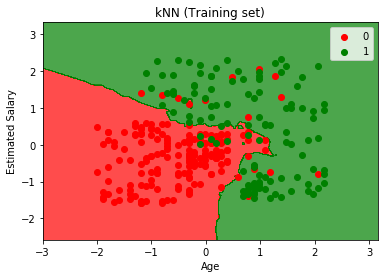

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:,0].max() + 1, step=0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

_ = plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.7, cmap = ListedColormap(('red', 'green')))
_ = plt.xlim(X1.min(), X1.max())
_ = plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

_ = plt.title('kNN (Training set)')
_ = plt.xlabel('Age')
_ = plt.ylabel('Estimated Salary')
_ = plt.legend()

### Visulaizing the results from the Test set

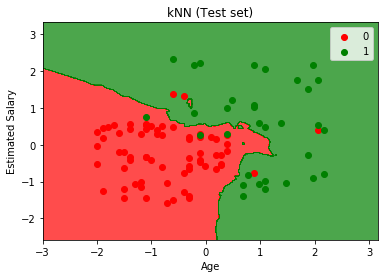

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:,0].max() + 1, step=0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

_ = plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.7, cmap = ListedColormap(('red', 'green')))
_ = plt.xlim(X1.min(), X1.max())
_ = plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

_ = plt.title('kNN (Test set)')
_ = plt.xlabel('Age')
_ = plt.ylabel('Estimated Salary')
_ = plt.legend()

We do have some incorrect predictions, but overall not too bad at all. With this model we would be ready to predict the category for a brand new observation!